<a href="https://colab.research.google.com/github/Aparnasunil15/titanic_dataset/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITANIC DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/archive (4).zip')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

FILLING MISSING VALUES

In [ ]:
a=df['Age'].mode()[0]
df['Age'].fillna(a,inplace=True)
b=df['Embarked'].mode()[0]
df['Embarked'].fillna(b,inplace=True)
c=df['Cabin'].mode()[0]
df['Cabin'].fillna(c,inplace=True)

EDA

<Axes: xlabel='Embarked'>

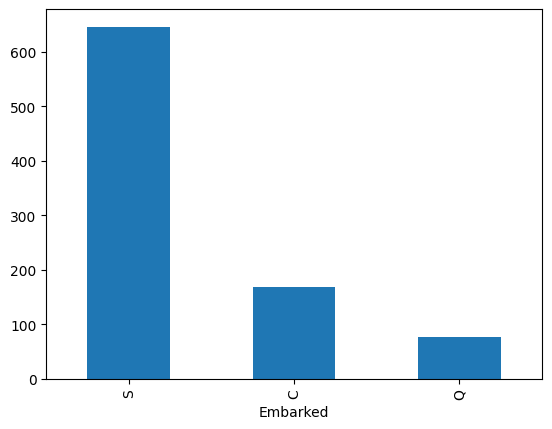

In [ ]:
df['Embarked'].value_counts().plot.bar()

VISUALIZE SURVIVAL RATE BY PASSENGER

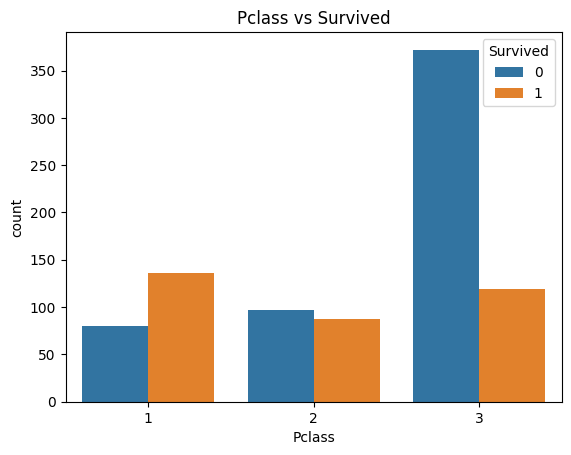

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title('Pclass vs Survived')
plt.show()

VISUALIZE SURVIVAL RATE BY GENDER

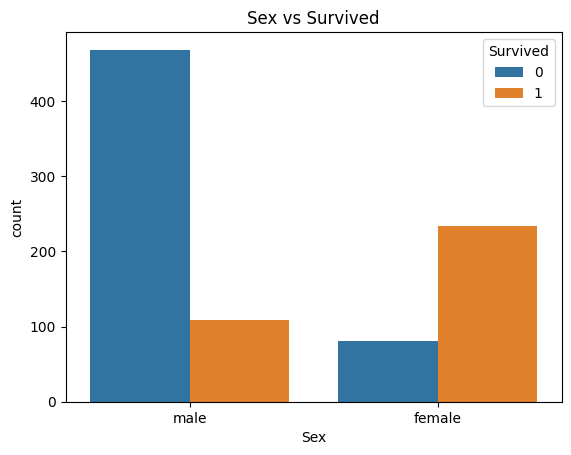

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title('Sex vs Survived')
plt.show()

VISUALIZE SURVIVAL BY AGE

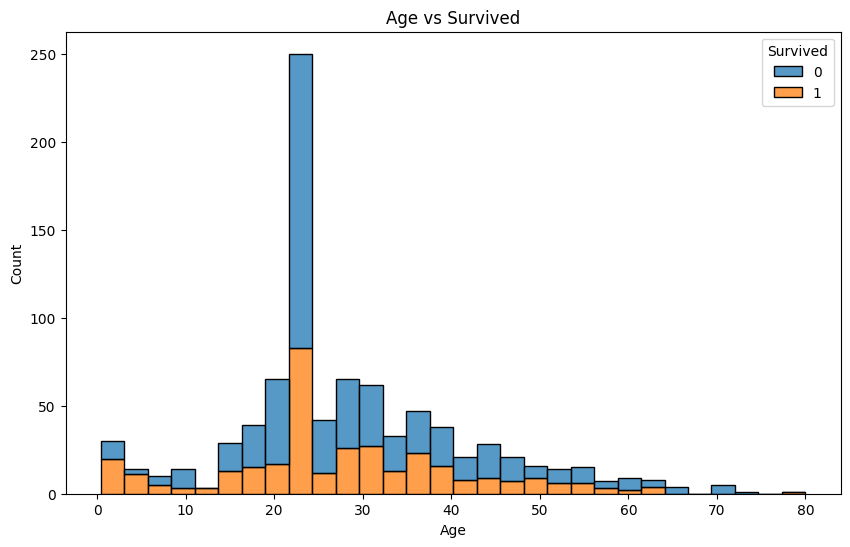

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Age',hue='Survived',multiple='stack',kde=False,bins=30)
plt.title('Age vs Survived')
plt.show()

In [ ]:
df.drop(['Name','Ticket','PassengerId','Cabin'],axis=1,inplace=True)

ENCODING

In [ ]:
df=pd.get_dummies(df,columns=['Sex','Embarked','Pclass'] ,drop_first=True)

In [ ]:
x=df.drop('Survived',axis=1)
y=df['Survived']

MODEL CREATION

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)
accuracy=rf.score(x_test,y_test)
accuracy

0.8100558659217877